<a href="https://colab.research.google.com/github/PsorTheDoctor/learning-from-videos/blob/master/notebooks/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q einops pybullet

In [2]:
!git clone https://github.com/PsorTheDoctor/learning-from-videos.git
%cd learning-from-videos

fatal: destination path 'learning-from-videos' already exists and is not an empty directory.
/content/learning-from-videos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # force_remount=True)

##Snake

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from models.vit import DeepViT

epochs = 3000
path = '../drive/MyDrive/learning-from-videos/data/snake/'
jointsPath = path + 'train/joints.npy'
imagesPath = path + 'train/images.npy'

print(np.load(imagesPath).shape)
print(np.load(jointsPath).shape)

vit = DeepViT(
  image_size = 256,
  patch_size = 32,
  num_classes = 2,
  dim = 1024,
  depth = 6,
  heads = 16,
  mlp_dim = 2048,
  dropout = 0.1,
  emb_dropout = 0.1
)
historySnake = vit.fit(epochs, jointsPath, imagesPath)

Text(0, 0.5, 'Loss')

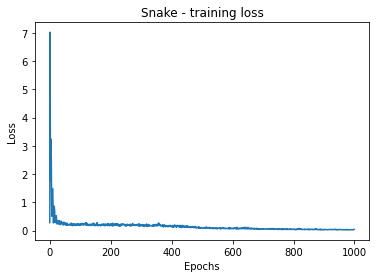

In [6]:
plt.plot(historySnake)
plt.title('Snake - training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [7]:
testImages = np.load(path + 'test/images.npy')
testJoints = np.load(path + 'test/joints.npy')
predJoints = vit(testImages)

pred = pd.concat([pd.DataFrame(np.squeeze(predJoints), columns=['pred_joint_1', 'pred_joint_2']),
                  pd.DataFrame(np.squeeze(testJoints), columns=['true_joint_1', 'true_joint_2']),
                  pd.DataFrame(np.squeeze(predJoints - testJoints), 
                               columns=['error_joint_1', 'error_joint_2'])], axis=1)
pred.head()

,pred_joint_1,pred_joint_2,true_joint_1,true_joint_2,error_joint_1,error_joint_2
0,0.030153,-0.321752,0.138451,-0.436834,-0.108298,0.115081
1,0.250717,0.681537,-0.322989,-0.448802,0.573706,1.130339
2,-0.267380,-0.066378,-0.220496,-0.105339,-0.046884,0.038961
3,0.089845,-0.406701,0.050451,0.323267,0.039394,-0.729968
4,0.776326,-0.062977,0.404573,0.645838,0.371753,-0.708816


#Turtle

In [ ]:
path = '../drive/MyDrive/learning-from-videos/data/turtle/'
jointsPath = path + 'train/joints.npy'
imagesPath = path + 'train/images.npy'

vit = DeepViT(
  image_size = 256,
  patch_size = 32,
  num_classes = 4,
  dim = 1024,
  depth = 6,
  heads = 16,
  mlp_dim = 2048,
  dropout = 0.1,
  emb_dropout = 0.1
)
historyTurtle = vit.fit(epochs, jointsPath, imagesPath)

In [ ]:
plt.plot(historyTurtle)
plt.title('Turtle - training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
testImages = np.load(path + 'test/images.npy')
testJoints = np.load(path + 'test/joints.npy')
predJoints = vit(testImages)

pred = pd.concat([pd.DataFrame(np.squeeze(predJoints), 
                               columns=['pred_joint_1', 'pred_joint_2', 'pred_joint_3', 'pred_joint_4']),
                  pd.DataFrame(np.squeeze(testJoints), 
                               columns=['true_joint_1', 'true_joint_2', 'true_joint_3', 'true_joint_4']),
                  pd.DataFrame(np.squeeze(predJoints - testJoints), 
                               columns=['error_joint_1', 'error_joint_2'])], axis=1)
pred.head()